Galstreams - Plotting Guide
============

In [13]:
import scipy
import pandas as pd
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import galstreams

In [15]:
mwsts = galstreams.MWStreams(verbose=False)

Initializing galstreams library from master_log... 


In [16]:
mwsts.summary.head(5)

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,-16.281973,25.126725,298.182168,-29.913159,26.839948,235.758575,38.821881,0000,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,14.448969,14.350060,157.510431,15.343949,15.929409,308.056470,72.509388,1101,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,0.417097,-15.901759,...,-20.427757,24.636741,4.915075,-18.117867,26.923444,64.503226,57.120874,1111,Shipp2018,3
AAU-ATLAS-L21,st,True,AAU-ATLAS-L21,AAU-ATLAS,li2021,Li2021,-,23.561687,8.931901,-21.023379,...,-33.199331,18.525495,20.058646,-26.983189,20.885277,73.360646,49.567099,1111,Koposov2014,4
Acheron-G09,ep,True,Acheron-G09,Acheron,grillmair2009,Grillmair2009,-,36.532092,230.000000,-2.000000,...,21.000000,3.800000,244.604606,10.300419,3.656382,142.339428,49.453184,0000,Grillmair2009,5


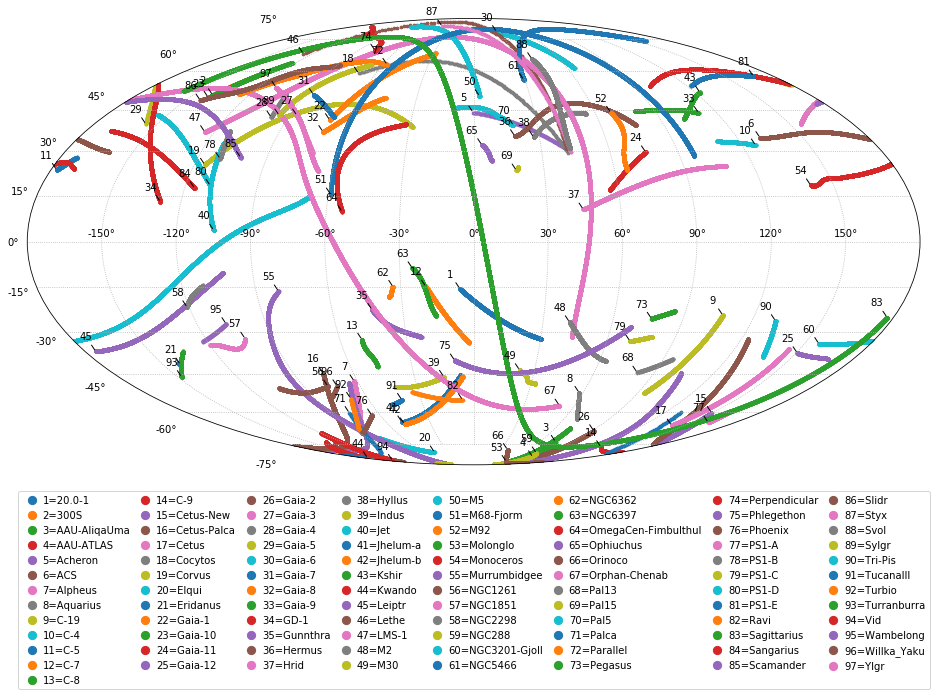

In [18]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')

for st in mwsts.keys():
  #Plot the tracks  
  ax.scatter(mwsts[st].track.galactic.l.wrap_at(180*u.deg).rad, 
             mwsts[st].track.galactic.b.rad, marker='.', s=30,
             label="{ID:.0f}={Name}".format(ID=mwsts[st].ID,Name=mwsts[st].stream_name))
  #Annotate at one of the end points  
  ax.annotate(mwsts[st].ID, xy=(mwsts[st].end_points.galactic.l.wrap_at(180*u.deg)[0].rad,mwsts[st].end_points.galactic.b[0].rad),
              xycoords='data',
              arrowprops=dict(arrowstyle="-",color='k'),
              horizontalalignment='center', verticalalignment='center', 
              xytext=(-10,15),textcoords='offset points',
              )

ax.legend(ncol=8,loc='center', columnspacing=0.5, handletextpad=0.1, 
          bbox_to_anchor=(0.5,-0.28), markerscale=3, fontsize='medium')
ax.grid(ls=':')
plt.savefig("../examples/quickex.png")

In [12]:
#mwsts.all_track_names()
mwsts.summary['TrackName']

TrackName
20.0-1-M18                  20.0-1-M18
300S-F18                      300S-F18
AAU-AliqaUma-L21      AAU-AliqaUma-L21
AAU-ATLAS-L21            AAU-ATLAS-L21
Acheron-G09                Acheron-G09
ACS-R21                        ACS-R21
Alpheus-G13                Alpheus-G13
Aquarius-W11              Aquarius-W11
C-19-I21                      C-19-I21
C-4-I21                        C-4-I21
C-5-I21                        C-5-I21
C-7-I21                        C-7-I21
C-8-I21                        C-8-I21
C-9-I21                        C-9-I21
Cetus-New-Y21            Cetus-New-Y21
Cetus-Palca-T21        Cetus-Palca-T21
Cetus-Palca-Y21        Cetus-Palca-Y21
Cetus-Y13                    Cetus-Y13
Chenab-S19                  Chenab-S19
Cocytos-G09                Cocytos-G09
Corvus-M18                  Corvus-M18
Elqui-S19                    Elqui-S19
Eridanus-M17              Eridanus-M17
Fimbulthul-I21          Fimbulthul-I21
Gaia-1-I21                  Gaia-1-I21
Gaia-10-I21    

In [14]:
mwsts.get_track_names_for_stream('Pal')

['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

In [17]:
pl = mwsts.get_track_names_for_stream('Pal')
mwsts.summary.loc[pl]

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
Cetus-Palca-T21,st,True,Cetus-Palca-T21,Cetus-Palca,thomas2021,Thomas2021,-,100.893295,47.263848,-67.102606,...,30.360435,26.324286,22.137384,-6.698769,33.390034,290.663039,-12.521054,1110,"Yanny2009,Newberg2009,Shipp2018,Thomas2021",16
Cetus-Palca-Y21,st,False,Cetus-Palca-Y21,Cetus-Palca,yuan2021,Yuan2021,-,152.201880,0.454405,46.215425,...,-72.110816,55.596768,25.983225,-22.479593,39.103648,105.664908,12.442173,1110,"Yanny2009,Newberg2009,Shipp2018,Thomas2021",
Pal13-S20,ep,True,Pal13-S20,Pal13,shipp2020,Shipp2020,-,10.922576,344.300000,8.900000,...,18.200000,23.600000,347.192122,13.567309,23.600000,248.984706,30.607012,0000,Shipp2018,68
Pal15-M17,st,True,Pal15-M17,Pal15,myeong2017,"Myeong2017,Harris1996",-,1.469166,255.346335,-1.465931,...,-0.123321,38.400000,255.116111,-0.769315,38.400000,164.752332,-23.287647,1000,Myeong2017,69
Pal5-I21,st,False,Pal5-I21,Pal5,ibata2021,Ibata2021,-,22.344661,223.094462,-7.483476,...,6.085956,20.373165,230.431819,1.041280,22.358774,138.929809,55.416800,1110,Odenkirchen2001,
Pal5-PW19,st,True,Pal5-PW19,Pal5,pricewhelan2019,"PriceWhelan2019_pal5,Bonaca2020",-,21.389020,242.093824,6.883095,...,-4.800515,19.088234,229.005945,-0.105794,20.537974,319.205273,-56.489779,1110,Odenkirchen2001,70
Pal5-S20,st,False,Pal5-S20,Pal5,starkman2020,Starkman2020,-,27.229987,240.312181,5.230912,...,-11.980545,22.500000,229.013158,-0.210752,22.500000,319.270000,-48.310000,1000,Odenkirchen2001,
Palca-S18,ep,True,Palca-S18,Palca,shipp2018,Shipp2018,-,57.321494,30.300000,-53.700000,...,2.400000,36.300000,21.437626,-25.808843,36.300000,286.617271,-9.857283,0000,Shipp2018,71


In [40]:
help(mwsts)

Help on MWStreams in module galstreams object:

class MWStreams(builtins.dict)
 |  MWStreams(verbose=False, implement_Off=False)
 |  
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Method resolution order:
 |      MWStreams
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, verbose=False, implement_Off=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  all_active_track_names(self)
 |  
 |  all_track_names(self)
 |  
 |  all_unique_stream_names(self)
 |  
 |  get_track_names_for_stream(self, StreamName)
 |  
 |  plot_stream_compilation(ax, 